# Convolutional neural network

In [9]:
!pip install tensorflow_hub


In [10]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
import tensorflow_hub as hub

In [20]:
import time

In [11]:
import tensorflow as tf
import keras 
#python==3.6.9
import pandas as pd
import numpy as np
from tensorflow.keras import layers


import numpy as np
from keras.preprocessing import image

from keras.models import Sequential
from keras.applications.vgg16 import VGG16
from keras.layers import Dense,Activation,Dropout,Conv2D,MaxPooling2D,Flatten
from keras.preprocessing.image import ImageDataGenerator 
import seaborn as sns



print(tf.__version__)
print(keras.__version__)
print(np.__version__)

2.6.0
2.6.0
1.16.6


In [17]:
image_height = 224
image_width = 224
batch_size = 32

In [ ]:
'''model = keras.Sequential([
    layers.Input((28,28,3)),
    layers.Conv2D(16,3, padding="same"),
    layers.Conv2D(32,3, padding="same"),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(3),
])

model.compile(loss ='SparseCategoricalcrossentropy', optimizer ='rmsprop',metrics =['accuracy']) '''

In [18]:
model = Sequential()
model.add(VGG16(weights="imagenet", include_top=False, input_shape=(224,224,3)))
model.add(Flatten())
model.add(Dense(128, activation="relu"))
model.add(Dense(64, activation="relu"))
model.add(Dense(64, activation="relu"))
model.add(Dense(4, activation="sigmoid"))
 
model.layers[-6].trainable = False

model.compile(loss ='SparseCategoricalCrossentropy', optimizer ='rmsprop',metrics =['accuracy']) 
 
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 7, 7, 512)         14714688  
_________________________________________________________________
flatten_2 (Flatten)          (None, 25088)             0         
_________________________________________________________________
dense_9 (Dense)              (None, 128)               3211392   
_________________________________________________________________
dense_10 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_11 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_12 (Dense)             (None, 4)                 260       
Total params: 17,938,756
Trainable params: 3,224,068
Non-trainable params: 14,714,688
__________________________________

In [35]:
#Loading MobileNetV2 architecture
CLASSIFIER_URL ="https://tfhub.dev/google/tf2-preview/mobilenet_v2/classification/2"
IMAGE_RES = 224 #Image size in pixels as MobileNet is trained on same img size

model1 = Sequential()
model1.add(hub.KerasLayer(CLASSIFIER_URL,input_shape=(224,224,3)))

model1.add(Dense(3,activation="softmax"))

model1.compile(optimizer="sgd",loss="SparseCategoricalCrossentropy",metrics=["accuracy"])
model1.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer_7 (KerasLayer)   (None, 1001)              3540265   
_________________________________________________________________
dense_17 (Dense)             (None, 3)                 3006      
Total params: 3,543,271
Trainable params: 3,006
Non-trainable params: 3,540,265
_________________________________________________________________


In [24]:
'''model = Sequential() 
model.add(Conv2D(32, (2, 2), input_shape = (120,120,3))) 
model.add(Activation('relu')) 
model.add(MaxPooling2D(pool_size =(2, 2))) 
  
model.add(Conv2D(64, (2, 2),padding='same')) 
model.add(Activation('relu')) 
model.add(MaxPooling2D(pool_size =(2, 2))) 
  
model.add(Conv2D(128, (2, 2),padding='valid')) 
model.add(Activation('relu')) 
model.add(MaxPooling2D(pool_size =(2, 2),strides=(1,1))) 
  
model.add(Flatten()) 
model.add(Dense(64)) 
model.add(Activation('relu')) 
model.add(Dropout(0.1)) 

model.add(Dense(3)) 
model.add(Activation('softmax'))



model.compile(loss ='SparseCategoricalCrossentropy', optimizer ='rmsprop',metrics =['accuracy']) '''

In [21]:
ds_train = tf.keras.preprocessing.image_dataset_from_directory(
"F:\\a for analytics\\afora",labels = 'inferred',
    label_mode = 'int',
    batch_size = batch_size, 
    image_size = (image_height,image_width),
    shuffle = True,
    seed = 123,
    validation_split = 0.1,
    subset = "training"
)

Found 6000 files belonging to 3 classes.
Using 5400 files for training.


In [22]:
ds_test = tf.keras.preprocessing.image_dataset_from_directory(
"F:\\a for analytics\\afora",labels = 'inferred',
    label_mode = 'int',
    batch_size = batch_size, 
    image_size = (image_height,image_width),
    shuffle = True,
    seed = 123,
    validation_split = 0.1,
    subset = "validation"
)

Found 6000 files belonging to 3 classes.
Using 600 files for validation.


In [23]:
def augment(x,y):
    image = tf.image.random_brightness(x,max_delta = 0.01)
    return image,y

In [24]:
ds_train = ds_train.map(augment)

In [25]:
ds_train

<MapDataset shapes: ((None, 224, 224, 3), (None,)), types: (tf.float32, tf.int32)>

In [10]:
import Augmentor

p = Augmentor.Pipeline("F:\\a for analytics\\Classification 20200820\\New")
p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
p.zoom(probability=0.3, min_factor=1.1, max_factor=1.6)
p.sample(2000)

Executing Pipeline:   0%|                                                               | 0/2000 [00:00<?, ? Samples/s]

Initialised with 302 image(s) found.
Output directory set to F:\a for analytics\Classification 20200820\New\output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=850x638 at 0x228824B29C8>: 100%|█| 2000/2000 [00:38<0


In [11]:
import Augmentor

c = Augmentor.Pipeline("F:\\a for analytics\\Classification 20200820\\OldBad")
c.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
c.zoom(probability=0.3, min_factor=1.1, max_factor=1.6)
c.sample(2000)

Executing Pipeline:   0%|                                                               | 0/2000 [00:00<?, ? Samples/s]

Initialised with 301 image(s) found.
Output directory set to F:\a for analytics\Classification 20200820\OldBad\output.

Processing <PIL.Image.Image image mode=RGB size=850x638 at 0x228EE17F108>: 100%|█| 2000/2000 [00:44<00:00, 44.73 Sample


In [12]:
a = Augmentor.Pipeline("F:\\a for analytics\\Classification 20200820\\OldGood")
a.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
a.zoom(probability=0.3, min_factor=1.1, max_factor=1.6)
a.sample(2000)

Executing Pipeline:   0%|                                                               | 0/2000 [00:00<?, ? Samples/s]

Initialised with 167 image(s) found.
Output directory set to F:\a for analytics\Classification 20200820\OldGood\output.

Processing <PIL.Image.Image image mode=RGB size=720x960 at 0x22881F7FA48>: 100%|█| 2000/2000 [00:50<00:00, 39.34 Sample


In [ ]:
start = time.time()
history = model.fit(ds_train,steps_per_epoch = len(ds_train),
                         epochs = 20,validation_data = ds_test, 
                            validation_steps = len(ds_test))
end = time.time()
print("Total train time: ",(end-start)/60," mins")

In [36]:
start = time.time()

history = model1.fit(ds_train,
                    steps_per_epoch=len(ds_train),
                    validation_data=(ds_test),
                    validation_steps=len(ds_test),
                    epochs=45)
end = time.time()
print("Total train time: ",(end-start)/60," mins")

Epoch 1/45
169/169 [==============================] - 153s 865ms/step - loss: 3.5239 - accuracy: 0.4169 - val_loss: 2.5609 - val_accuracy: 0.4933
Epoch 2/45
169/169 [==============================] - 127s 750ms/step - loss: 2.6199 - accuracy: 0.4791 - val_loss: 1.2931 - val_accuracy: 0.5633
Epoch 3/45
169/169 [==============================] - 149s 880ms/step - loss: 2.7113 - accuracy: 0.4909 - val_loss: 1.5748 - val_accuracy: 0.5333
Epoch 4/45
169/169 [==============================] - 135s 792ms/step - loss: 2.3021 - accuracy: 0.5087 - val_loss: 1.5977 - val_accuracy: 0.5183
Epoch 5/45
169/169 [==============================] - 137s 812ms/step - loss: 2.1882 - accuracy: 0.5209 - val_loss: 2.2983 - val_accuracy: 0.4917
Epoch 6/45
169/169 [==============================] - 133s 784ms/step - loss: 2.0541 - accuracy: 0.5361 - val_loss: 3.6436 - val_accuracy: 0.5117
Epoch 7/45
169/169 [==============================] - 151s 892ms/step - loss: 2.1750 - accuracy: 0.5281 - val_loss: 1.6886 -

In [26]:
test_image = image.load_img('F:\\a for analytics\\New.jpg',
                            target_size = (150,150,3))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = model.predict(test_image)


In [27]:
test_image = image.load_img('F:\\a for analytics\\OldBad.jpg',
                            target_size = (150,150,3))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
res = model.predict(test_image)


In [28]:
if result[0][0] == 1:
    print('New')
elif result[0][1]==1:
    print('OldBad')
elif result[0][2]==1:
    print('OldGood')

New


In [29]:
if res[0][0] == 1:
    print('New')
elif res[0][1]==1:
    print('OldBad')
elif res[0][2]==1:
    print('OldGood')

OldBad


In [40]:
test_image = image.load_img('F:\\a for analytics\\New.jpg',
                            target_size = (224,224,3))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = model1.predict(test_image)


In [42]:
test_image = image.load_img('F:\\a for analytics\\OldBad.jpg',
                            target_size = (224,224,3))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
res = model1.predict(test_image)

In [41]:
if result[0][0] == 1:
    print('New')
elif result[0][1]==1:
    print('OldBad')
elif result[0][2]==1:
    print('OldGood')

In [43]:
if res[0][0] == 1:
    print('New')
elif res[0][1]==1:
    print('OldBad')
elif res[0][2]==1:
    print('OldGood')

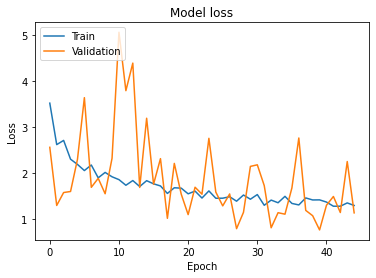

In [44]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

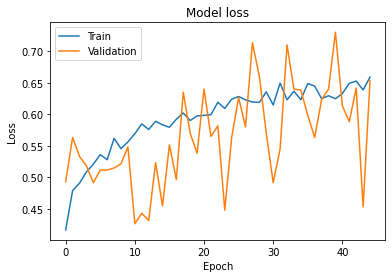

In [45]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [49]:
model.save('user.h5')

ValueError: Unable to create dataset (name already exists)